In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
img = load_img()

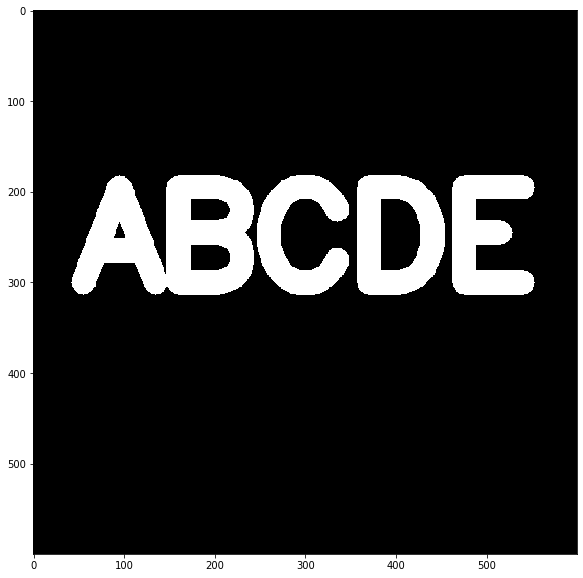

In [5]:
display_img(img)

In [6]:
kernel = np.ones((5,5), dtype=np.uint8)

In [7]:
result = cv2.erode(img, kernel, iterations=4)

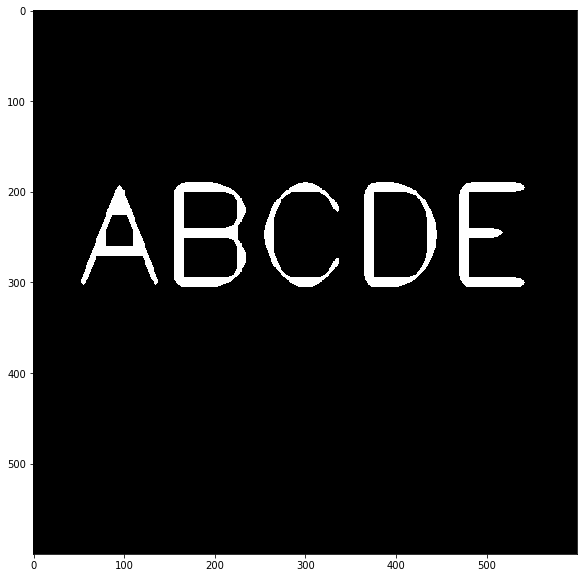

In [8]:
display_img(result)

In [9]:
img = load_img()

In [10]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [11]:
white_noise

array([[1, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1]])

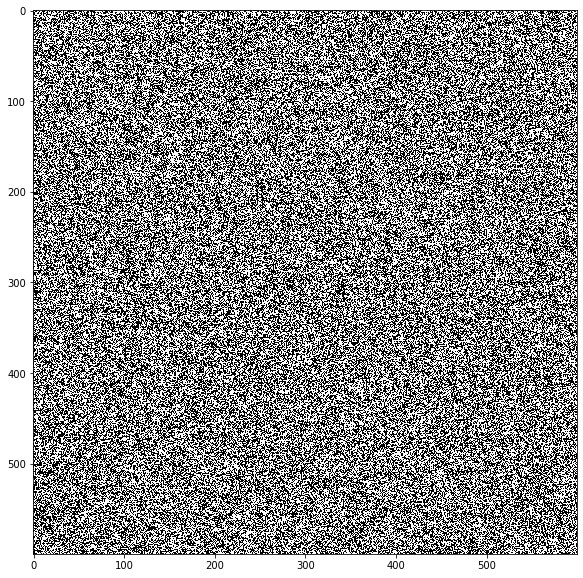

In [12]:
display_img(white_noise)

In [13]:
img.max()

255.0

In [14]:
white_noise = white_noise * 255

In [15]:
white_noise

array([[255,   0, 255, ...,   0, 255, 255],
       [255, 255,   0, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255]])

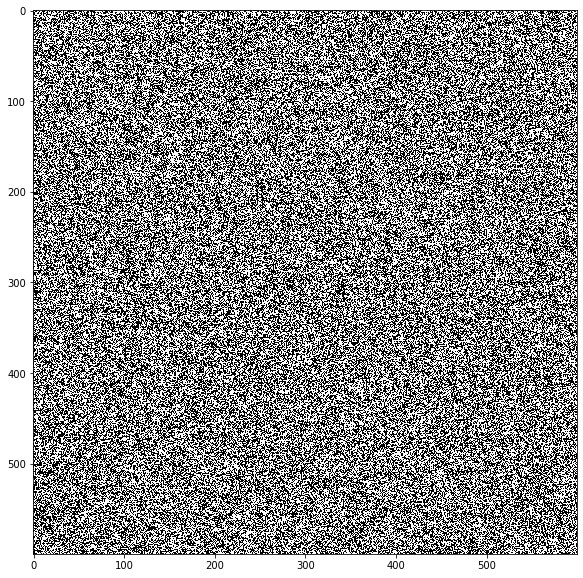

In [16]:
display_img(white_noise)

In [17]:
noise_img = white_noise + img

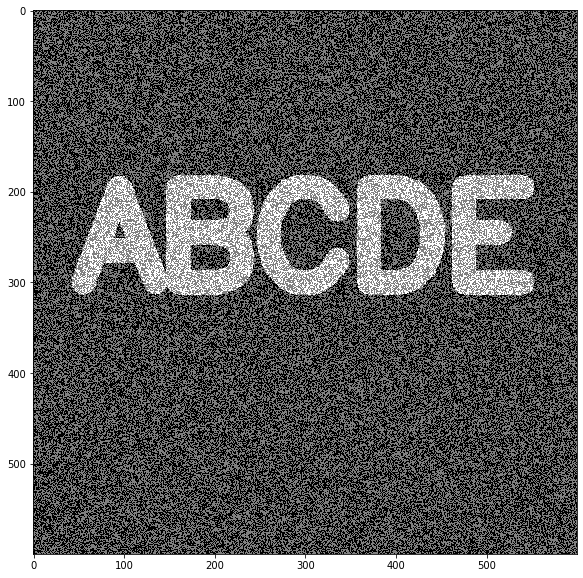

In [18]:
display_img(noise_img)

In [19]:
#Erosion, followed by dilation. Used for removing background noise
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

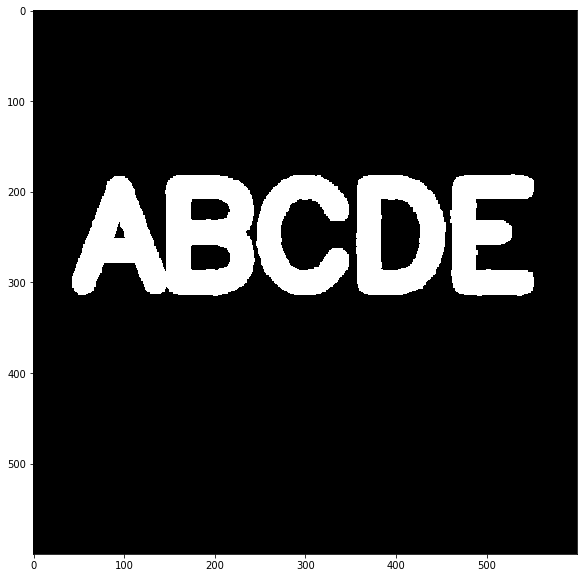

In [20]:
display_img(opening)

In [21]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

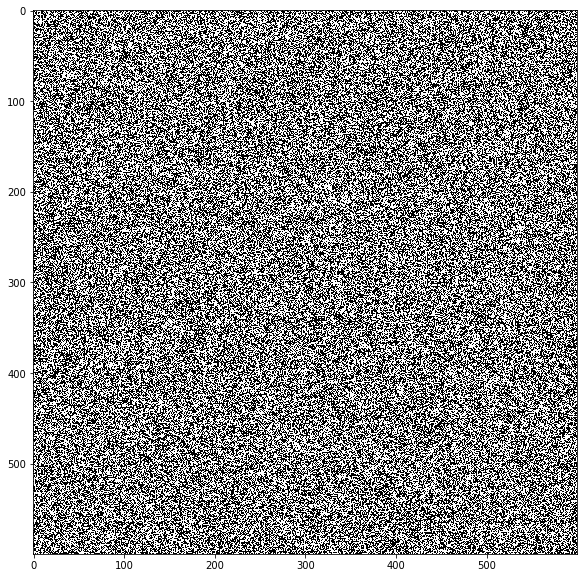

In [22]:
display_img(black_noise)

In [23]:
black_noise = black_noise * -255

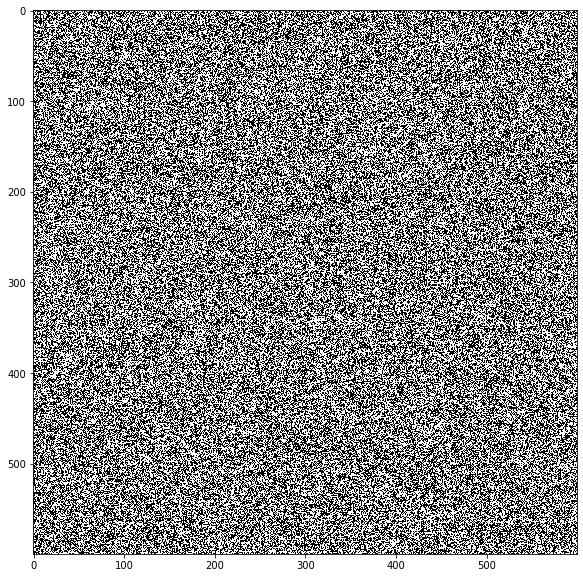

In [24]:
display_img(black_noise)

In [25]:
black_noise_img = img + black_noise

In [26]:
black_noise_img

array([[   0., -255., -255., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ..., -255.,    0., -255.],
       [   0., -255.,    0., ..., -255., -255.,    0.],
       ...,
       [-255., -255., -255., ...,    0., -255.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ...,    0.,    0., -255.]])

In [27]:
black_noise_img[black_noise_img == -255] = 0

In [28]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

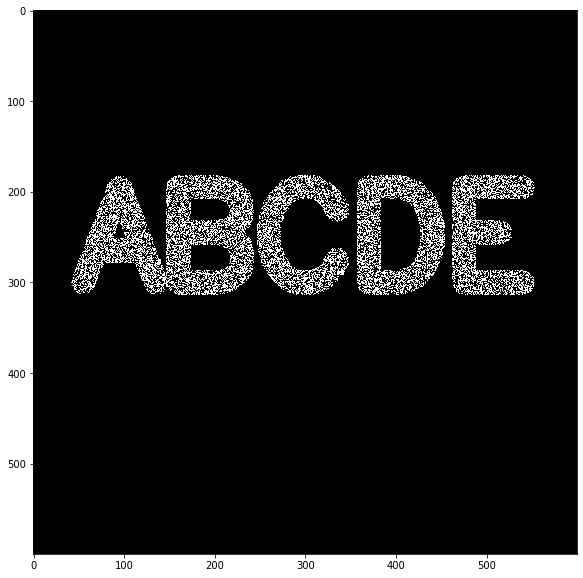

In [29]:
display_img(black_noise_img)

In [30]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

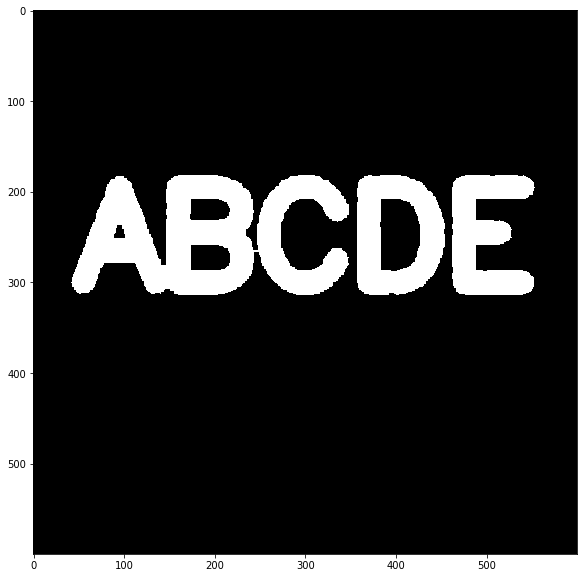

In [31]:
display_img(closing)

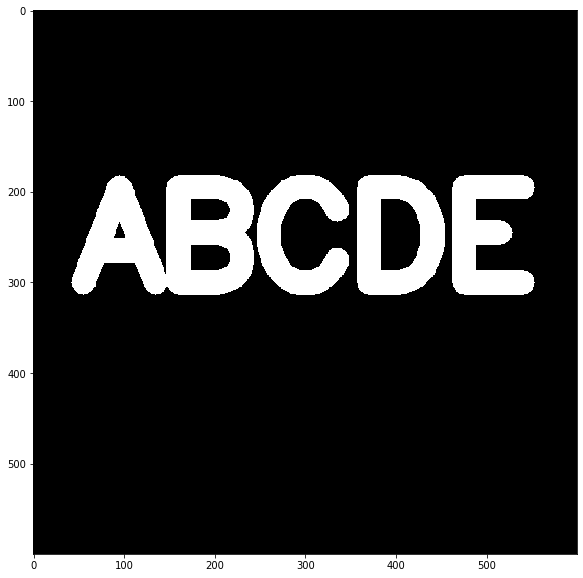

In [32]:
display_img(img)

In [34]:
#Dilation followed by erosion
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

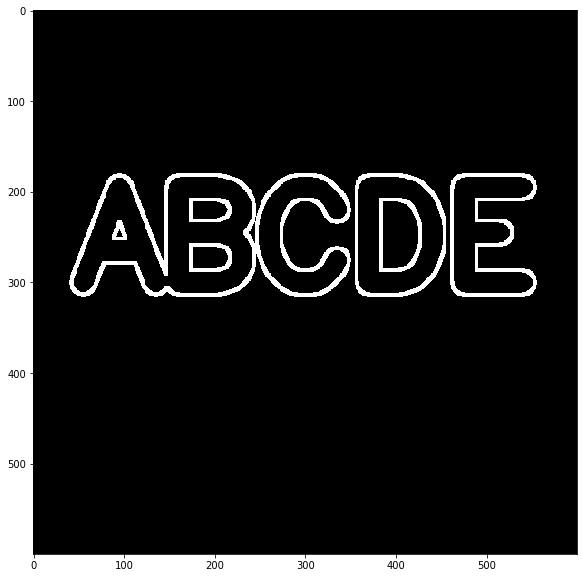

In [35]:
display_img(gradient)